# **Лабораторная работа №1** "Инструментальные средства машинного обучения"
# **Выполнил: Мухамеджанов Артур; группа: ПИН-б-о-22-1**

## https://archive.ics.uci.edu/dataset/162/forest+fires

## Первичный анализ данных

### Общее описание набора данных Forest Fires

Данный набор данных содержит информацию о лесных пожарах в различных парках Португалии и включает 517 записей с 13 характеристиками. Каждая запись описывает условия и результаты пожаров.

### Описание признаков

1. **X** - координата X на карте парка
2. **Y** - координата Y на карте парка
3. **month** - месяц, в котором произошел пожар
4. **day** - день недели, в который произошел пожар
5. **FFMC** - Fine Fuel Moisture Code, индекс влажности легковоспламеняющегося материала
6. **DMC** - Duff Moisture Code, индекс влажности слоев почвы
7. **DC** - Drought Code, индекс периодической засухи 
8. **ISI** - Initial Spread Index, начальный индекс распространения огня
9. **temp** - температура в градусах Цельсия
10. **RH** - относительная влажность в процентах
11. **wind** - скорость ветра в км/ч
12. **rain** - количество осадков, мм/м2
13. **area** - площадь лесного пожара в гектарах (целевая переменная)

### Характеристики данных

- Количество элементов (Instances): 517
- Количество признаков (Features): 13
- Связанные задачи: Регрессия
- Характеристики набора данных: Многомерные (Multivariate)
- Тип признаков: Числовые (Numeric), Категориальные (Categorical: month, day)

### Распределение целевой переменной "area"

Распределение целевой переменной "area" позволяет оценить размеры лесных пожаров, что полезно для анализа тяжести и последствий пожаров в зависимости от различных погодных и географических условий.


Этот набор данных является ценным источником для анализа влияния различных факторов на возникновение и распространение лесных пожаров, а также для разработки моделей, предсказывающих площадь пожара по известным условиям окружающей среды.

### Подключение библиотеки NumPy и загрузка данных

In [ ]:
import pandas as pd

data_path = "forestfires.csv"
data = pd.read_csv(data_path, header=None)
print(data[:4])

  0  1      2    3     4     5      6    7     8   9     10    11    12
0  X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
1  7  5    mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7     0     0
2  7  4    oct  tue  90.6  35.4  669.1  6.7    18  33   0.9     0     0
3  7  4    oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3     0     0


### Тип переменной и форма (shape)

In [ ]:
print ( "Data type : ", type(data) )
print ( "Data shape : ", data.shape )
print (data[:1])

Data type :  <class 'pandas.core.frame.DataFrame'>
Data shape :  (518, 13)
  0  1      2    3     4    5   6    7     8   9     10    11    12
0  X  Y  month  day  FFMC  DMC  DC  ISI  temp  RH  wind  rain  area


### Получение типа набора данных, строки, элемента

In [ ]:
data1 = pd.read_csv(data_path, header=None)
print('Shape of the dataset:', data1.shape)
print('Dataset type:', type(data1))
print('A single row of the dataset is type of:', type(data1[0]))
print('Types of elements:', type(data1[0][1]), type(data1[0][4]))
print('Dataset:')
print(data1)

Shape of the dataset: (518, 13)
Dataset type: <class 'pandas.core.frame.DataFrame'>
A single row of the dataset is type of: <class 'pandas.core.series.Series'>
Types of elements: <class 'str'> <class 'str'>
Dataset:
    0  1      2    3     4     5      6     7     8   9     10    11     12
0    X  Y  month  day  FFMC   DMC     DC   ISI  temp  RH  wind  rain   area
1    7  5    mar  fri  86.2  26.2   94.3   5.1   8.2  51   6.7     0      0
2    7  4    oct  tue  90.6  35.4  669.1   6.7    18  33   0.9     0      0
3    7  4    oct  sat  90.6  43.7  686.9   6.7  14.6  33   1.3     0      0
4    8  6    mar  fri  91.7  33.3   77.5     9   8.3  97     4   0.2      0
..  .. ..    ...  ...   ...   ...    ...   ...   ...  ..   ...   ...    ...
513  4  3    aug  sun  81.6  56.7  665.6   1.9  27.8  32   2.7     0   6.44
514  2  4    aug  sun  81.6  56.7  665.6   1.9  21.9  71   5.8     0  54.29
515  7  4    aug  sun  81.6  56.7  665.6   1.9  21.2  70   6.7     0  11.16
516  1  4    aug  sat  9

### Указание типа столбцов при загрузке данных

In [ ]:
dt = np.dtype("f8, f8, f8, f8, U30")
data2 = pd.read_csv(data_path, header=None)
print('Shape of the dataset:', data2.shape)
print('Dataset type:', type(data2))
print('A single row of the dataset is type of:', type(data2[0]))
print('Types of elements:', type(data2[0][1]), type(data2[0][4]))
print('Dataset slice:')
print(data2[:10])

Shape of the dataset: (518, 13)
Dataset type: <class 'pandas.core.frame.DataFrame'>
A single row of the dataset is type of: <class 'pandas.core.series.Series'>
Types of elements: <class 'str'> <class 'str'>
Dataset slice:
  0  1      2    3     4      5      6     7     8   9     10    11    12
0  X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
1  7  5    mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7     0     0
2  7  4    oct  tue  90.6   35.4  669.1   6.7    18  33   0.9     0     0
3  7  4    oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3     0     0
4  8  6    mar  fri  91.7   33.3   77.5     9   8.3  97     4   0.2     0
5  8  6    mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8     0     0
6  8  6    aug  sun  92.3   85.3    488  14.7  22.2  29   5.4     0     0
7  8  6    aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1     0     0
8  8  6    aug  mon  91.5  145.4  608.2  10.7     8  86   2.2     0     0
9  8  6    sep  tue    91  129.5  692.

### Построение графиков с использованием Matplotlib

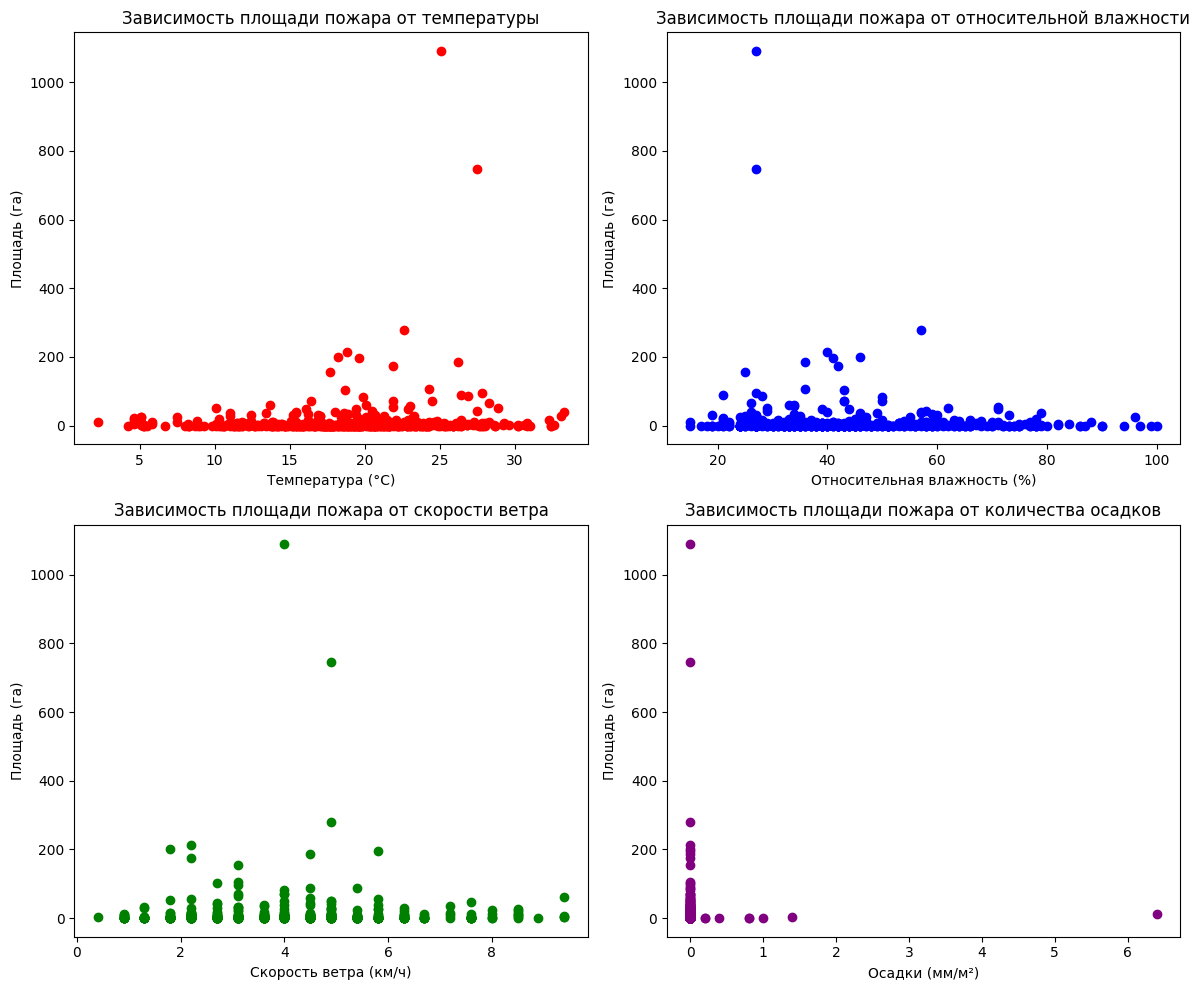

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt



# Загрузка данных из файла CSV

data_path = 'forestfires.csv'

data = pd.read_csv(data_path)



# Визуализируем зависимости площади пожара от различных метеорологических параметров

plt.figure(figsize=(12, 10))  # Задаем размер области с графиками



# Связь площади пожара с температурой

plt.subplot(2, 2, 1)  # Подготовка первой сетки из 2x2 для графика

plt.scatter(data['temp'], data['area'], color='red')  # Создаем диаграмму разброса с красными точками

plt.title('Зависимость площади пожара от температуры')

plt.xlabel('Температура (°C)')

plt.ylabel('Площадь (га)')



# Связь площади пожара с относительной влажностью

plt.subplot(2, 2, 2)  # Подготовка второй ячейки сетки для графика

plt.scatter(data['RH'], data['area'], color='blue')  # Диаграмма разброса с синими точками

plt.title('Зависимость площади пожара от относительной влажности')

plt.xlabel('Относительная влажность (%)')

plt.ylabel('Площадь (га)')



# Связь площади пожара со скоростью ветра

plt.subplot(2, 2, 3)  # Третья ячейка сетки

plt.scatter(data['wind'], data['area'], color='green')  # Зеленые точки на диаграмме

plt.title('Зависимость площади пожара от скорости ветра')

plt.xlabel('Скорость ветра (км/ч)')

plt.ylabel('Площадь (га)')



# Связь площади пожара с количеством осадков

plt.subplot(2, 2, 4)  # Четвертая ячейка сетки

plt.scatter(data['rain'], data['area'], color='purple')  # Фиолетовые точки для осадков

plt.title('Зависимость площади пожара от количества осадков')

plt.xlabel('Осадки (мм/м²)')

plt.ylabel('Площадь (га)')



plt.tight_layout()  # Автоматическая корректировка подметок, заголовков и т.д.

plt.show()  # Отобразить все графики

## Контрольные вопросы

### **1. Какие инструментальные средства используются для организации рабочего места специалиста Data Science?**

Для организации рабочего места специалиста Data Science используются следующие инструментальные средства:

1. **Языки программирования**: Ключевым инструментом является Python, который широко используется в области Data Science благодаря своей простоте, мощности и богатой экосистеме библиотек.
   
2. **Интегрированные среды разработки (IDE)**: Популярные IDE для Data Science включают PyCharm, Jupyter Notebook, Spyder и VS Code. Они обеспечивают удобную среду для написания, отладки и выполнения кода.

3. **Библиотеки и фреймворки**: Для обработки данных и построения моделей машинного обучения используются библиотеки такие как NumPy, Pandas, Scikit-learn, TensorFlow и PyTorch.

4. **Виртуальные среды**: Для изоляции проектов и управления зависимостями часто используются виртуальные среды, такие как virtualenv или conda.

5. **Системы управления версиями**: Для отслеживания изменений в коде и совместной работы над проектами используются системы контроля версий, например Git.

Эти инструменты помогают специалистам Data Science эффективно работать с данными, создавать и тестировать модели машинного обучения.

### **2. Какие библиотеки Python используются для работы в области машинного обучения? Дайте краткую характеристику каждой библиотеки.**

Популярных библиотеки:

1. **NumPy**: NumPy — это основная библиотека для работы с многомерными массивами и матрицами в Python. Она предоставляет мощные инструменты для работы с данными и выполнения математических операций.

2. **Pandas**: Pandas предоставляет высокоуровневые структуры данных и инструменты для анализа данных. Она упрощает чтение, запись и манипулирование данными, что делает ее идеальным инструментом для предобработки данных.

3. **Scikit-learn**: Scikit-learn — это библиотека машинного обучения с открытым исходным кодом, которая предоставляет простой и эффективный инструментарий для анализа данных и построения моделей машинного обучения.

4. **TensorFlow**: TensorFlow — это популярная библиотека глубокого обучения, разработанная компанией Google. Она предоставляет инструменты для построения и обучения нейронных сетей.

5. **PyTorch**: PyTorch — еще одна популярная библиотека глубокого обучения, которая широко используется для исследований и разработки моделей нейронных сетей.

Каждая из этих библиотек имеет свои преимущества и подходит для различных задач в области машинного обучения.

### **3. Почему при реализации систем машинного обучения широкое распространение получили библиотеки Python?**

Библиотеки Python получили широкое распространение при реализации систем машинного обучения по нескольким причинам:

1. **Простота и удобство**: Python известен своей простотой и удобством в использовании. Синтаксис Python легко читаем и понятен, что делает его привлекательным для начинающих и опытных разработчиков.

2. **Большое сообщество**: Python имеет огромное сообщество разработчиков, которые активно разрабатывают и поддерживают различные библиотеки и фреймворки для машинного обучения. Это обеспечивает доступ к обширным ресурсам и поддержке.

3. **Мощные библиотеки и фреймворки**: В Python существует множество высококачественных библиотек и фреймворков для машинного обучения, таких как NumPy, Pandas, Scikit-learn, TensorFlow и PyTorch. Эти инструменты обеспечивают широкие возможности для разработки и экспериментов с моделями машинного обучения.

4. **Интеграция с другими технологиями**: Python легко интегрируется с другими технологиями и инструментами, что делает его удобным выбором для построения систем машинного обучения, включая работу с базами данных, веб-сервисами и другими компонентами.

5. **Обширное применение**: Python широко используется не только в области машинного обучения, но и в других областях разработки программного обеспечения, что способствует его популярности и распространению среди разработчиков.

## Вывод

В ходе лабораторной работы были достигнуты следующие результаты:

- Установлена и настроена среда разработки Python для работы специалиста по анализу данных и машинному обучению.
- Изучены принципы загрузки и очистки данных, что позволило приобрести навыки по предварительной обработке данных на языке Python.
- Освоены основные библиотеки Python для работы с данными, что расширило набор инструментов специалиста по анализу данных.

Таким образом, проделанная работа позволила овладеть основными навыками и инструментами необходимыми для успешной работы в области анализа данных и машинного обучения.